In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BhartiAirtel.csv to BhartiAirtel.csv


In [ ]:
df = pd.read_csv("BhartiAirtel.csv")

In [ ]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,4-June-2021,534.80,535.75,531.25,532.70,533.229306,661985,12196,352989802.0,398176.0,60.15,4.50,-2.10
1,3-June-2021,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25
2,2-June-2021,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
3,1-June-2021,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
4,31-May-2021,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15


In [ ]:
#converting date column to datetime tyoe
df['Date'] = pd.to_datetime(df['Date'])
df_sort = df.sort_values('Date')
df_sort.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2581,2011-01-03,358.4,364.90,354.50,359.35,360.257123,316463,5263,114008050.0,82793.0,26.16,10.40,0.95
2580,2011-01-04,361.0,361.75,353.10,355.30,359.347771,510966,3163,183614493.0,364759.0,71.39,8.65,-5.70
2579,2011-01-05,353.9,355.70,348.35,349.90,351.481252,172421,2552,60602749.0,43428.0,25.19,7.35,-4.00
2578,2011-01-06,351.0,355.35,351.00,353.25,353.230604,196241,2516,69318327.0,41231.0,21.01,4.35,2.25
2577,2011-01-07,353.9,354.75,335.00,338.70,342.594042,358515,5778,122825103.0,73576.0,20.52,19.75,-15.20


## Visualization


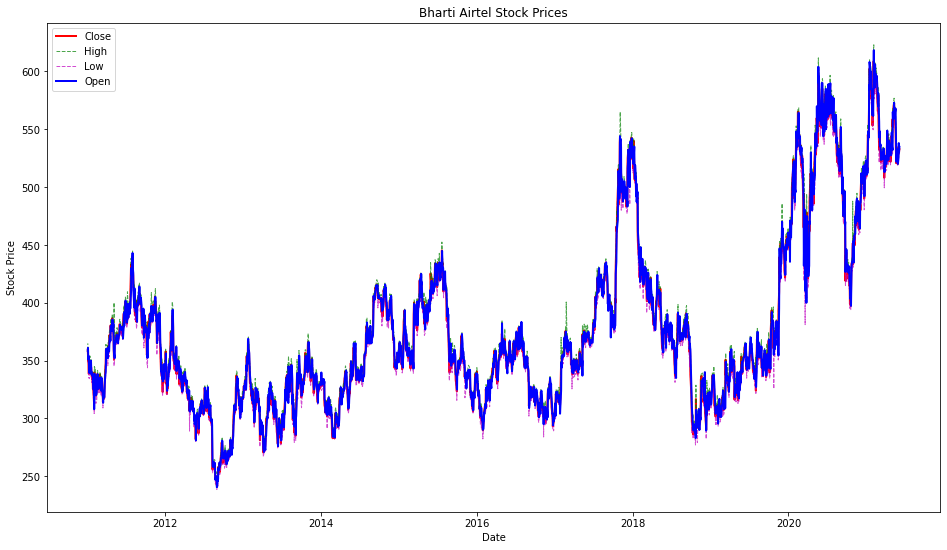

In [ ]:
plt.figure(figsize=(16,9))

plt.plot(df.Date, df['Close Price'], lw=2, color='r',label='Close')
plt.plot(df.Date, df['High Price'], lw=1, color='g',linestyle='--',alpha=0.7,label='High')
plt.plot(df.Date, df['Low Price'], lw=1, color='m',linestyle='--',alpha=0.7,label='Low')
plt.plot(df.Date, df['Open Price'], lw=2, color='b',label='Open')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Bharti Airtel Stock Prices')
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
data=df[["Date","Close Price"]]
data=data.rename(columns={"Date": "ds", "Close Price": "y"})

In [ ]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2942,2022-05-31,702.370337,628.410055,772.985962
2943,2022-06-01,702.872074,635.482449,779.438851
2944,2022-06-02,702.878518,630.026514,774.565668
2945,2022-06-03,703.282991,634.781887,777.270463
2946,2022-06-04,695.097315,619.921956,771.083070


In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-03,341.988452,307.603605,387.034463,341.988452,341.988452,4.570406,4.570406,4.570406,1.073113,1.073113,1.073113,3.497292,3.497292,3.497292,0.0,0.0,0.0,346.558858
1,2011-01-04,342.172700,307.093216,386.197196,342.172700,342.172700,5.196238,5.196238,5.196238,1.048349,1.048349,1.048349,4.147889,4.147889,4.147889,0.0,0.0,0.0,347.368938
2,2011-01-05,342.356948,311.770744,388.357149,342.356948,342.356948,5.704140,5.704140,5.704140,0.940158,0.940158,0.940158,4.763981,4.763981,4.763981,0.0,0.0,0.0,348.061087
3,2011-01-06,342.541196,307.128438,389.235917,342.541196,342.541196,5.675439,5.675439,5.675439,0.338189,0.338189,0.338189,5.337250,5.337250,5.337250,0.0,0.0,0.0,348.216635
4,2011-01-07,342.725443,309.288540,391.177824,342.725443,342.725443,5.996864,5.996864,5.996864,0.136081,0.136081,0.136081,5.860784,5.860784,5.860784,0.0,0.0,0.0,348.722308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2022-05-31,699.125800,628.410055,772.985962,641.434392,759.756497,3.244537,3.244537,3.244537,1.048349,1.048349,1.048349,2.196188,2.196188,2.196188,0.0,0.0,0.0,702.370337
2943,2022-06-01,699.435232,635.482449,779.438851,641.365692,760.512740,3.436842,3.436842,3.436842,0.940158,0.940158,0.940158,2.496683,2.496683,2.496683,0.0,0.0,0.0,702.872074
2944,2022-06-02,699.744665,630.026514,774.565668,641.318570,761.210816,3.133853,3.133853,3.133853,0.338189,0.338189,0.338189,2.795664,2.795664,2.795664,0.0,0.0,0.0,702.878518
2945,2022-06-03,700.054097,634.781887,777.270463,641.338084,761.735881,3.228894,3.228894,3.228894,0.136081,0.136081,0.136081,3.092814,3.092814,3.092814,0.0,0.0,0.0,703.282991


In [ ]:
forcast.loc[(forcast['ds'] == '2021-08-25' )]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2663,2021-08-25,612.794131,569.882831,653.158539,609.250374,616.841452,-1.720151,-1.720151,-1.720151,0.940158,0.940158,0.940158,-2.66031,-2.66031,-2.66031,0.0,0.0,0.0,611.07398


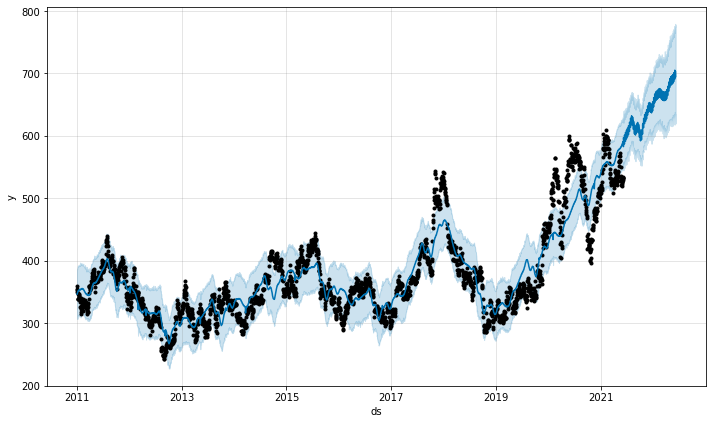

In [ ]:
fig1 = model.plot(forcast)